In [1]:
import pickle

In [2]:
y_orig = pickle.load(open("FINAL35-orig2.obj", "rb"))
y_new = pickle.load(open("FINAL35-new2.obj", "rb"))

In [12]:
len(y_orig), len(y_new)

(2500, 2500)

In [15]:
# print(y_orig[:10])
# print(y_new[:10])
with open('out.txt', 'w') as f:
    for i in range(len(y_orig)):
        f.write(y_orig[i].replace('\n', ' '))
        f.write('\n')
        f.write(y_new[i].replace('\n', ' '))
        f.write('\n')
        f.write('\n')

In [16]:
yo, yn = 0, 0
nex = len(y_orig)
for i in range(nex):
    yo += len(y_orig[i])
    yn += len(y_new[i])
yo/nex, yn/nex


(283.2484, 304.8104)

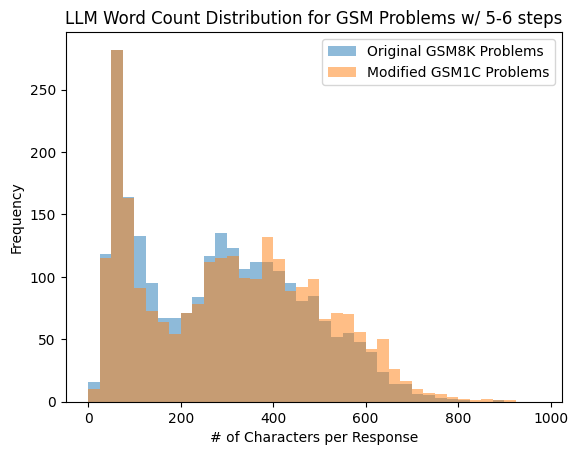

In [28]:
import matplotlib.pyplot as plt

y_orig = pickle.load(open("FINAL35-orig2.obj", "rb"))
y_new = pickle.load(open("FINAL35-new2.obj", "rb"))

orig_lens = [len(s) for s in y_orig]
new_lens = [len(s) for s in y_new]
bins = range(0,1000,25)

plt.hist(orig_lens, bins, alpha=0.5, label='Original GSM8K Problems')
plt.hist(new_lens, bins, alpha=0.5, label='Modified GSM1C Problems')
plt.xlabel('# of Characters per Response')
plt.ylabel('Frequency')
plt.title('LLM Word Count Distribution for GSM Problems w/ 5-6 steps')
plt.legend()
plt.savefig('dist-5-6.jpg', dpi=150)


^ new lens typically a bit longer, lets compare to all of the outputs not just the 5-6 steps

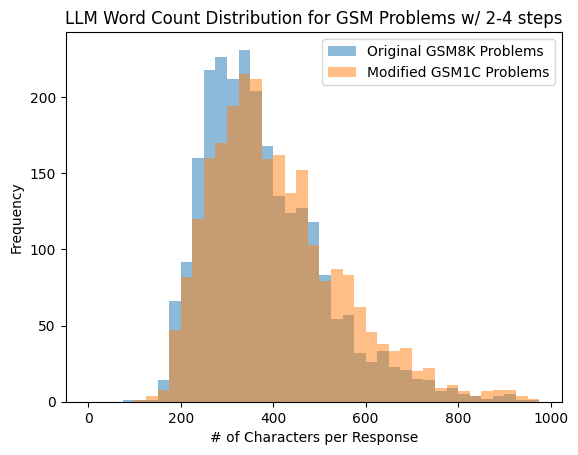

In [27]:
y_orig = pickle.load(open("FINAL35-orig.obj", "rb"))
y_new = pickle.load(open("FINAL35-new.obj", "rb"))

orig_lens = [len(s) for s in y_orig]
new_lens = [len(s) for s in y_new]
bins = range(0,1000,25)

# plt.hist(orig_lens, bins, alpha=0.5)
# plt.hist(new_lens, bins, alpha=0.5)
plt.hist(orig_lens, bins, alpha=0.5, label='Original GSM8K Problems')
plt.hist(new_lens, bins, alpha=0.5, label='Modified GSM1C Problems')
plt.xlabel('# of Characters per Response')
plt.ylabel('Frequency')
plt.title('LLM Word Count Distribution for GSM Problems w/ 2-4 steps')
plt.legend()
plt.savefig('dist-2-4.jpg', dpi=150)

In [3]:
import json
#open dataset and store it as a JSON object
with open('../GSM-IC/GSM-IC_mstep.json', 'r') as file:
    questions = json.load(file)
with open('../GSM-IC/GSM-IC_2step.json', 'r') as file:
    questions2 = json.load(file)
    #initialize the Groq client. This allows us to query Llama3 (or another model) from my Groq account

all_questions = []
all_questions.extend(questions2)
all_questions.extend(questions)
x = []
for steps in [2, 3, 4, 5, 6]:
    x.extend([i for i in all_questions if i['n_steps'] == steps][:500])

FileNotFoundError: [Errno 2] No such file or directory: '../GSM-IC/GSM-IC_mstep.json'

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


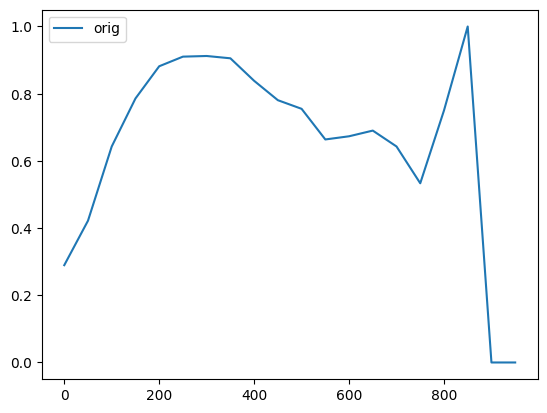

In [11]:
import collections
import matplotlib.pyplot as plt
def calculate_length_accs(y):
    lns = collections.defaultdict(list)
    for q, a in zip(x, y):
        try:
            correct_answer = q['answer']
            llm_answer = a.split("he answer is")[1]
            correct = correct_answer in llm_answer

            lns[len(a)].append(correct)
        except Exception as e:
            print(e)
    return lns

lns_orig = calculate_length_accs(y_orig)
lns_new = calculate_length_accs(y_new)
from statistics import mean
bin_size = 50
xs = []
yo, yn = [], []
for i in range(0, 1000, bin_size):
    xs.append(i)
    po = []
    pn = []
    for k in range(i, i + bin_size):
        po.extend(lns_orig[k] + lns_new[k])
        # pn.extend(lns_new[k])
    if po: yo.append(mean(po))
    elif yo: yo.append(yo[-1])
    else: yo.append(0)
    # if pn: yn.append(mean(pn))
    # elif yn: yn.append(yn[-1])
    # else: yn.append(0)

plt.plot(xs, yo, label='orig')
# plt.plot(xs, yn, label='new')
plt.legend()

In [23]:
# Inspect a specific output
print(x[1504], y_orig[1504], y_new[1504], sep="\n")

{'original_question': 'Annie brought 20 brownies to school.  She gave half of them to the school administrator to put in the faculty lounge.  Of the remaining brownies, she gave half to her best friend, Carl, and another two to her friend, Simon.  How many brownies did she have left?', 'answer': '3', 'new_question': "Annie brought 20 brownies to school. She gave half of them to the school administrator to put in the faculty lounge. Of the remaining brownies, she gave half to her best friend, Carl, and another two to her friend, Simon. Annie's mother got 300 more cookies than Carl on that day. How many brownies did Annie have left?", 'n_steps': 5, 'role': "Annie's mother", 'number': '300', 'sentence_template': '{role} got {number} more cookies than Carl on that day.', 'role_label': 'overlapped', 'number_label': 'out_range', 'sentence_label': 'in_topic'}
After giving away half to the school administrator, Annie had 10 brownies left. 
Then after giving half to Carl, she had 5 brownies lef